# Laboratorio 3 – Deep Learning
### Universidad del Valle de Guatemala
Este notebook cubre los ejercicios 1 al 4 del laboratorio, utilizando el dataset PolyMNIST (modalidades m0 a m4).

---

## Introducción
El objetivo de este laboratorio es desarrollar modelos de deep learning capaces de reconocer caracteres manuscritos utilizando el dataset **PolyMNIST**, el cual cuenta con 5 modalidades distintas (`m0` a `m4`). Cada modalidad presenta imágenes con diferentes fondos, pero los mismos dígitos.

En este notebook se abordarán los siguientes puntos:
1. Mostrar ejemplos de cada modalidad.
2. Análisis exploratorio del dataset.
3. Implementación de dos modelos CNN.
4. Implementación de una red neuronal simple sin convoluciones.

## Ejercicio 1 – Ejemplos de cada modalidad

In [124]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
!unzip "/content/drive/MyDrive/data/PolyMNIST.zip" -d "/content/"


Archive:  /content/drive/MyDrive/data/PolyMNIST.zip
replace /content/__MACOSX/._PolyMNIST? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Muestra de imagenes por cada modalidad
- en este aparado visualizamos algunas de las imágenes que tiene cada modalidad. Se mostrarán las primeras 5 imágenes por cada modalidad con el fin de observa de mejor manera como se encutrar y asi poder determinar que cambiamos podremos hacer.

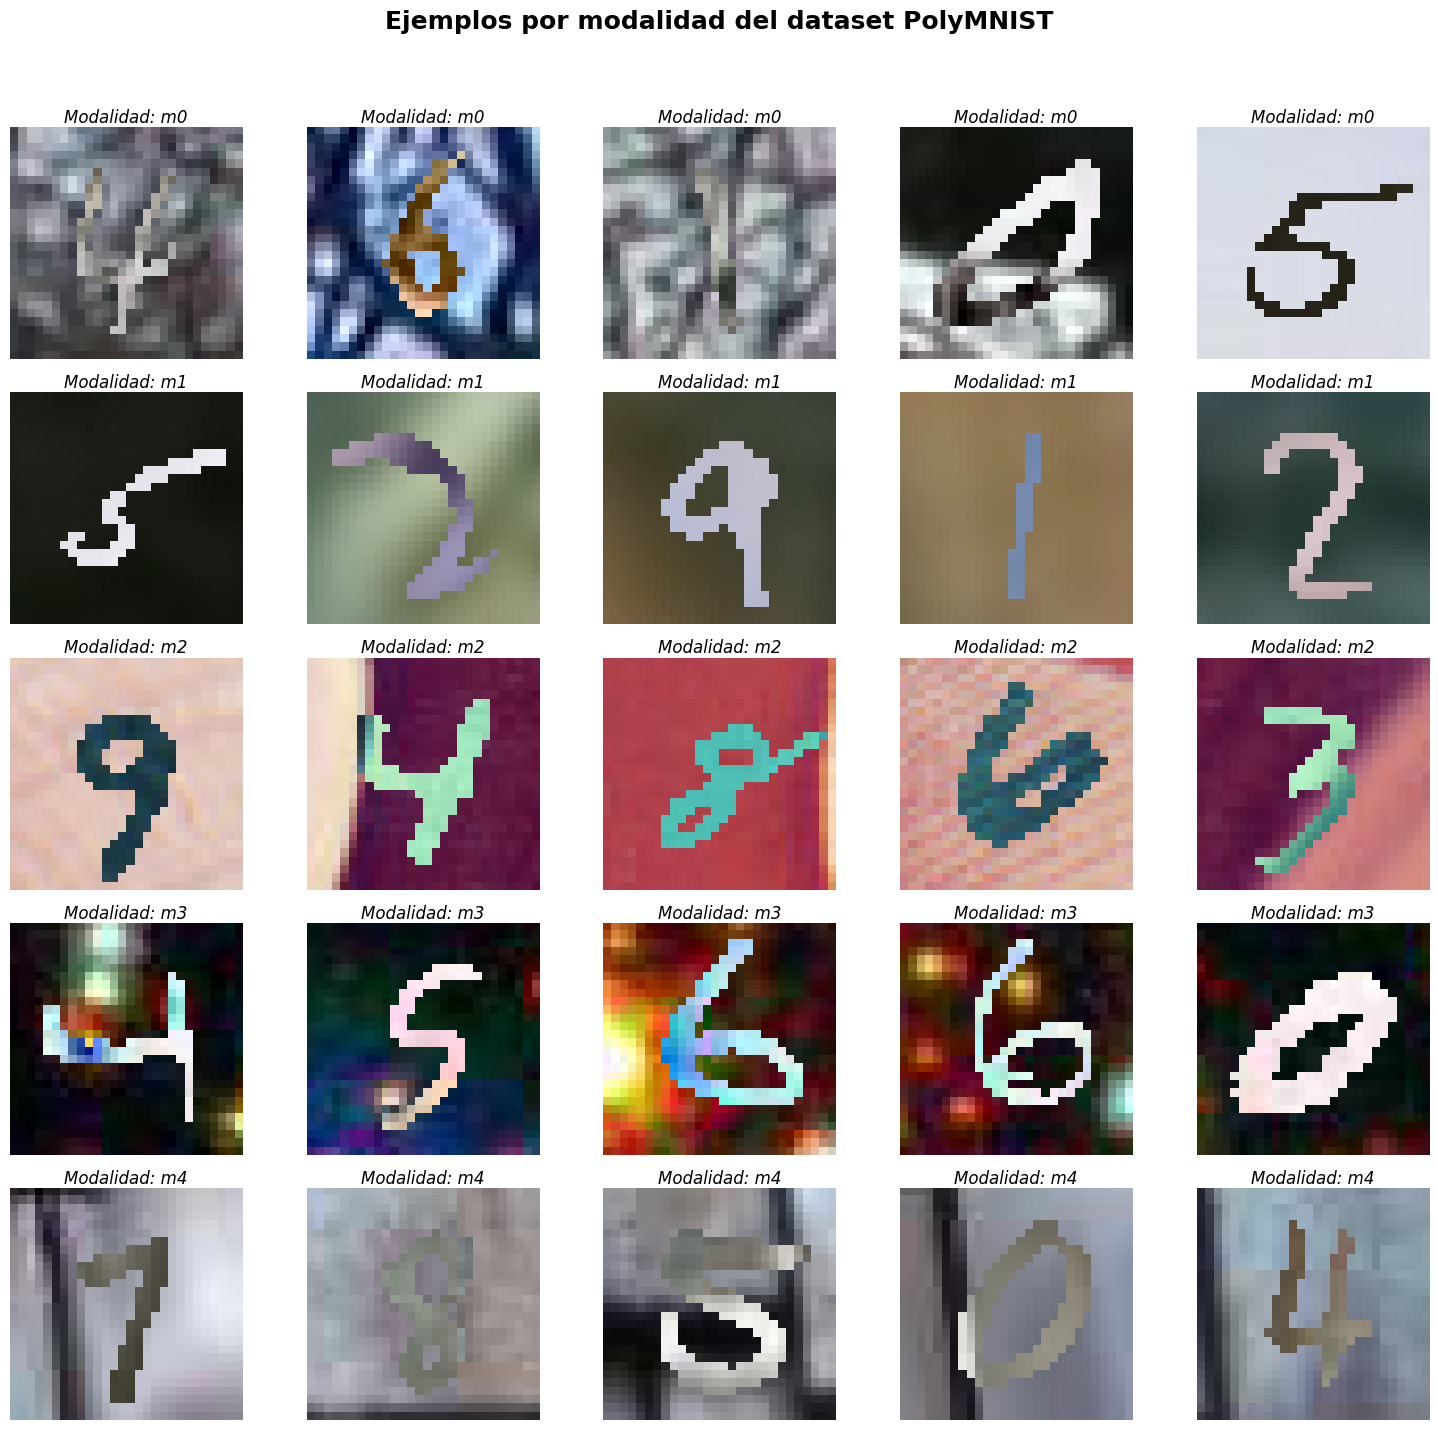

In [137]:
import os
import random
import matplotlib.pyplot as plt
import cv2

modalidades = ["m0", "m1", "m2", "m3", "m4"]
base_path = "/content/PolyMNIST/MMNIST/train"

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.suptitle("Ejemplos por modalidad del dataset PolyMNIST", fontsize=18, fontweight="bold")

for row, modalidad in enumerate(modalidades):
    path = os.path.join(base_path, modalidad)
    imagenes = [f for f in os.listdir(path) if f.endswith(".png")]
    muestras = random.sample(imagenes, 5)

    for col, nombre_img in enumerate(muestras):
        img_path = os.path.join(path, nombre_img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = axes[row, col]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"Modalidad: {modalidad}", fontsize=12, pad=3, fontstyle='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observaciones sobre las modalidades del dataset PolyMNIST

- Cada modalidad (`m0` a `m4`) presenta variaciones visuales distintas en el fondo.

- El dígito manuscrito es el elemento constante entre modalidades, pero cambia su color, grosor y contraste.

- Las modalidades m3 y m4 son visualmente más ruidosas.

Variación en los fondos por modalidad
Cada modalidad (m0, m1, m2, m3, m4) tiene un estilo de fondo característico:

- m0: fondos sólidos o texturas simples (como azul claro).

- m1: colores más vivos o planos (naranja, marrón).

- m2: fondos con texturas más orgánicas o difusas (rosado, rojo).

- m3: fondos oscuros o con efectos de luces, como luces navideñas (muy ruidoso).

- m4: desenfoque, alto contraste o mezcla de tonos grises (más abstracto).



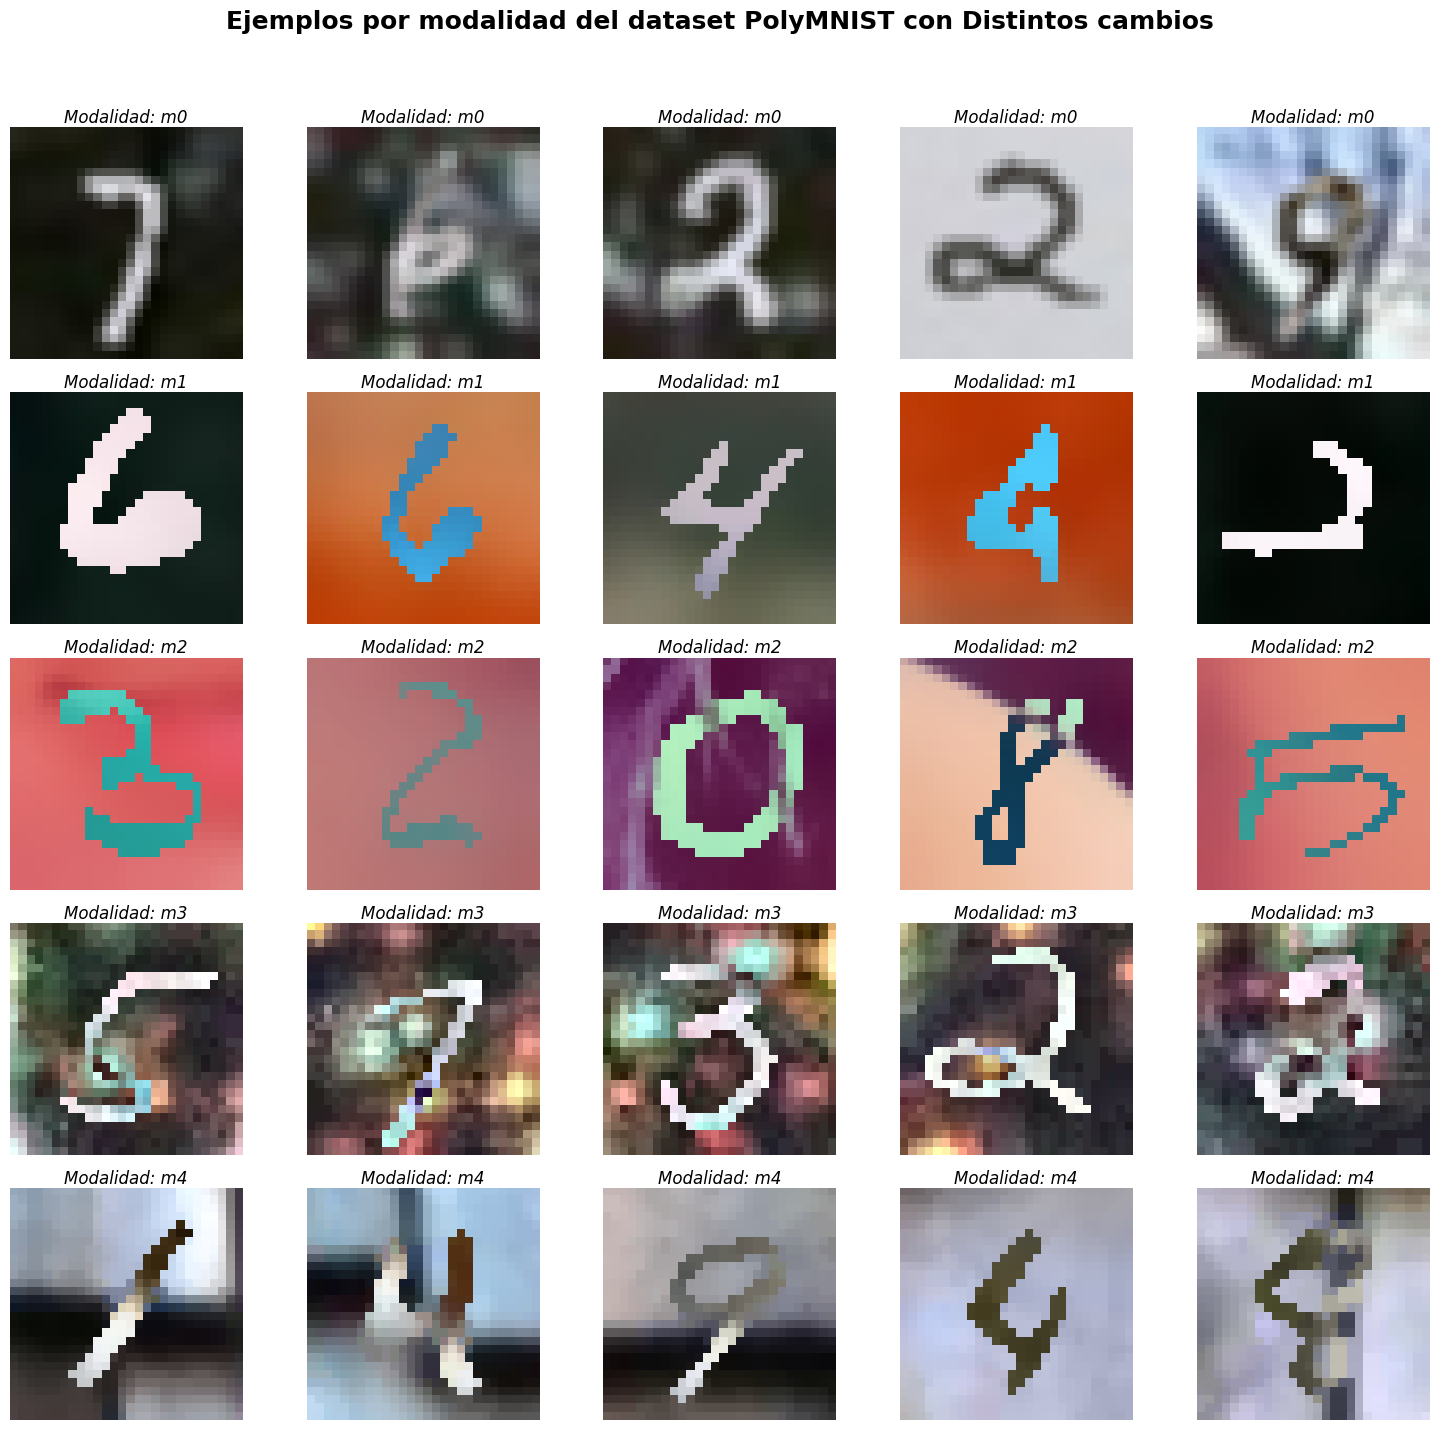

In [143]:
import os
import random
import matplotlib.pyplot as plt
import cv2

modalidades = ["m0", "m1", "m2", "m3", "m4"]
base_path = "/content/PolyMNIST/MMNIST/train"

def aplicar_filtro(img, modalidad):
    if modalidad == "m0":
        # Ligero suavizado gaussiano
        return cv2.GaussianBlur(img, (3, 3), 0)
    elif modalidad == "m1":
        # Suavizado mediano (mejor para ruido sal y pimienta)
        return cv2.medianBlur(img, 3)
    elif modalidad == "m2":
        # Bilateral (suaviza sin perder bordes)
        return cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
    elif modalidad == "m3":
        # Suavizado + mejora de contraste CLAHE
        img = cv2.bilateralFilter(img, 9, 75, 75)
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        l_clahe = clahe.apply(l)
        lab = cv2.merge((l_clahe, a, b))
        return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    elif modalidad == "m4":
        # Suavizado mediano (mejor para ruido sal y pimienta)
        return cv2.medianBlur(img, 3)
    else:
        return img  # por defecto sin filtro

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.suptitle("Ejemplos por modalidad del dataset PolyMNIST con Distintos cambios", fontsize=18, fontweight="bold")

for row, modalidad in enumerate(modalidades):
    path = os.path.join(base_path, modalidad)
    imagenes = [f for f in os.listdir(path) if f.endswith(".png")]
    muestras = random.sample(imagenes, 5)

    for col, nombre_img in enumerate(muestras):
        img_path = os.path.join(path, nombre_img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img = aplicar_filtro(img, modalidad)

        ax = axes[row, col]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"Modalidad: {modalidad}", fontsize=12, pad=3, fontstyle='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Con el objetivo de analizar cómo responden visualmente las distintas modalidades del dataset PolyMNIST a diversas técnicas de reducción de ruido, se aplicaron filtros específicos a cada grupo de imágenes. Inicialmente, se probó un filtro Gaussiano en la modalidad m0, un filtro mediano en m1 y m4, y un filtro bilateral en m2, debido a su capacidad para suavizar la imagen sin perder detalles en los bordes. En la modalidad m3, se combinó el filtro bilateral con una mejora de contraste usando CLAHE, para resaltar mejor los niveles de intensidad. Tras observar los resultados visuales de cada modalidad, se concluyó que el filtro aplicado a la modalidad m2 ofrecía el mejor balance entre reducción de ruido y preservación de contornos, manteniendo la legibilidad de los dígitos sin generar desenfoques excesivos. Por esta razón, en versiones posteriores del experimento, se optó por aplicar el mismo filtro bilateral utilizado en m2 a todas las modalidades, estandarizando el tratamiento de las imágenes y obteniendo una calidad visual más uniforme y adecuada para futuras tareas de clasificación.

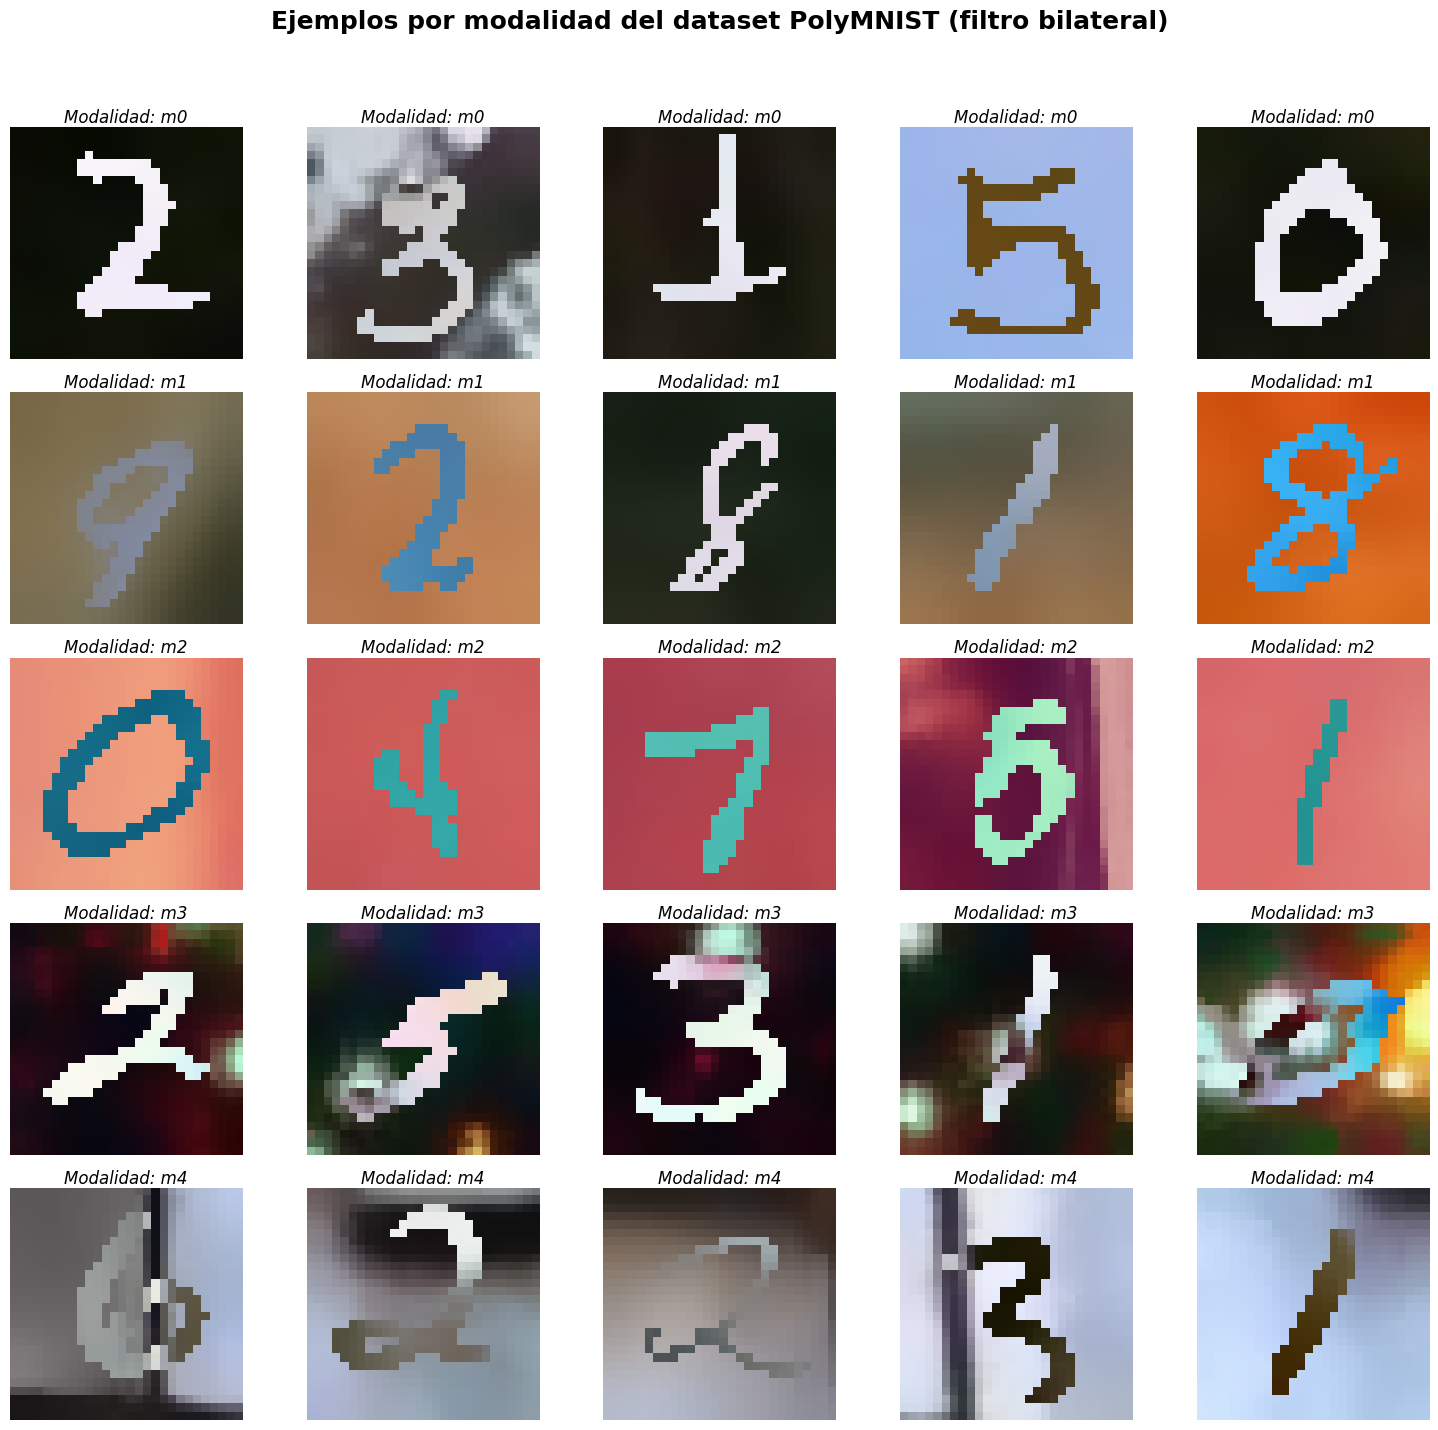

In [142]:
import os
import random
import matplotlib.pyplot as plt
import cv2

modalidades = ["m0", "m1", "m2", "m3", "m4"]
base_path = "/content/PolyMNIST/MMNIST/train"

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.suptitle("Ejemplos por modalidad del dataset PolyMNIST (filtro bilateral)", fontsize=18, fontweight="bold")

for row, modalidad in enumerate(modalidades):
    path = os.path.join(base_path, modalidad)
    imagenes = [f for f in os.listdir(path) if f.endswith(".png")]
    muestras = random.sample(imagenes, 5)

    for col, nombre_img in enumerate(muestras):
        img_path = os.path.join(path, nombre_img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Aplicar filtro bilateral a todas las imágenes
        img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

        ax = axes[row, col]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"Modalidad: {modalidad}", fontsize=12, pad=3, fontstyle='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
